In [1]:
from numpy import *
from matplotlib.pyplot import *
import matplotlib.pylab as pylab
import matplotlib.lines as mlines
%matplotlib inline
pylab.rcParams['figure.figsize']= 16,5
import pandas as pd
import gc

In [49]:
def plot_Solutions(PredictsList,Mean,TS,MeanRMSE,RMSE):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-13:len(TS)-6].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-13:len(TS)-6].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
    TSMeanPred = TS[len(TS)-13:len(TS)-6].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    ax = fig.add_subplot(111)
    ax.set_title('in_N=[12,13], hi_N= [9,11,13], learn_R=[0.15,0.2,0.25], iter=[20,50]')
    
    ax.text(TS[-7],-7,'mean RMSE= ' + (str)(MeanRMSE) + '\nRMSE = ' + (str)(RMSE) )
    
    #title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMSE))
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    #title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMSE))
    legend(handles = [linePred,lineMean,lineVal],loc= 1)
    fig.savefig("Results/iteraciones_def/predicions.png")
    del fig
    gc.collect()

In [15]:
parametersList =  pd.read_csv("Results/iteraciones_def/parameters.csv" )

In [14]:
predictions = pd.read_csv("Results/iteraciones_def/predicions.csv" )

In [4]:
predictions = predictions[predictions['Param1']>1]

In [5]:
predictions = predictions.reset_index(drop = True)

In [6]:
preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6']

In [7]:
params = ['Param1','Param2','Param3','Param4']

In [24]:
def get_TS():
    rawData = pd.read_csv('Resources/Consulta_Banxico.csv', sep=',', encoding='latin1', skiprows=15, skip_blank_lines=True)
    Data = rawData.drop(rawData.index[:2])
    Data = Data.reset_index(drop = True)
    Data.columns = ['Fecha' , 'Tasa de crecimiento Mensual']
    TS = pd.Series(Data['Tasa de crecimiento Mensual'].astype(float))
    TS.index= Data['Fecha']
    del Data
    return TS

In [9]:
TS = get_TS()

In [10]:
meanPred = np.mean(predictions[preds])
RMSE = np.sqrt(np.mean((TS[-12:-6].values-meanPred)**2))
predRMSE = np.sqrt(np.mean(predictions['MSE']))

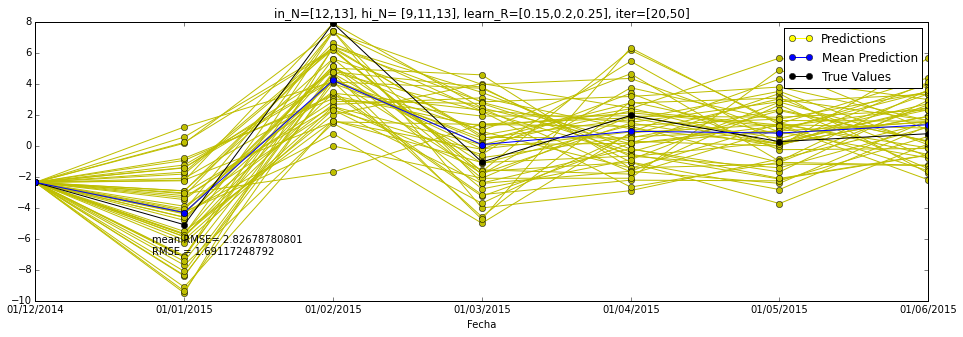

In [50]:
plot_Solutions(predictions[preds].as_matrix(),meanPred.as_matrix(),TS,predRMSE,RMSE)

In [12]:
predMSE = np.mean(predictions['MSE'])
print predMSE

7.99072931153


In [136]:
predParam1 = predictions.groupby('Param1')

In [137]:
predParam1.count()

,Param2,Param3,Param4,Pred1,Pred2,Pred3,Pred4,Pred5,Pred6,MSE,Time
Param1,,,,,,,,,,,
12,18,18,18,18,18,18,18,18,18,18,18
13,32,32,32,32,32,32,32,32,32,32,32


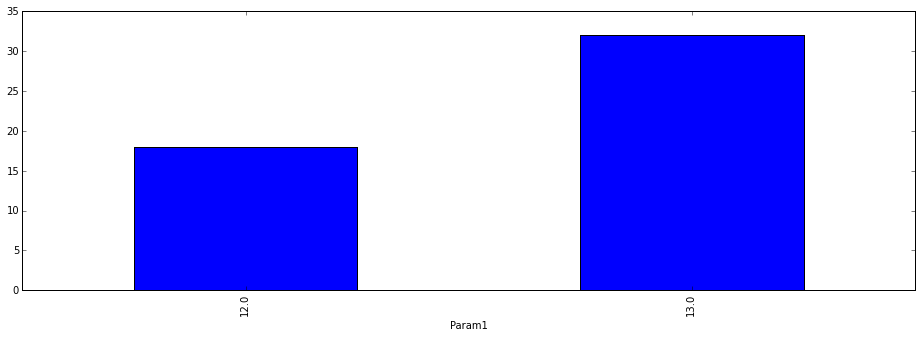

In [138]:
(predParam1['Param2'].count()).plot(kind='bar')

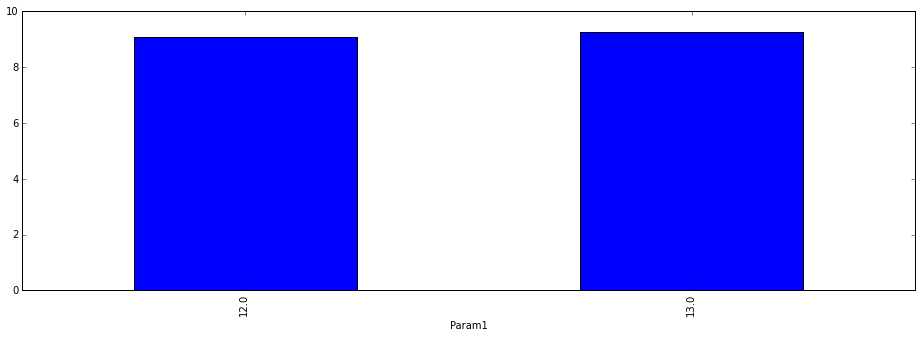

In [139]:
predParam1['MSE'].mean().plot(kind="bar")

In [140]:
predParam1_2 = predictions.groupby(['Param1','Param2'])

In [141]:
predParam1_2['MSE'].mean()

Param1  Param2
12      9         9.110198
        11        9.046848
13      9         9.361768
        11        9.065056
Name: MSE, dtype: float64

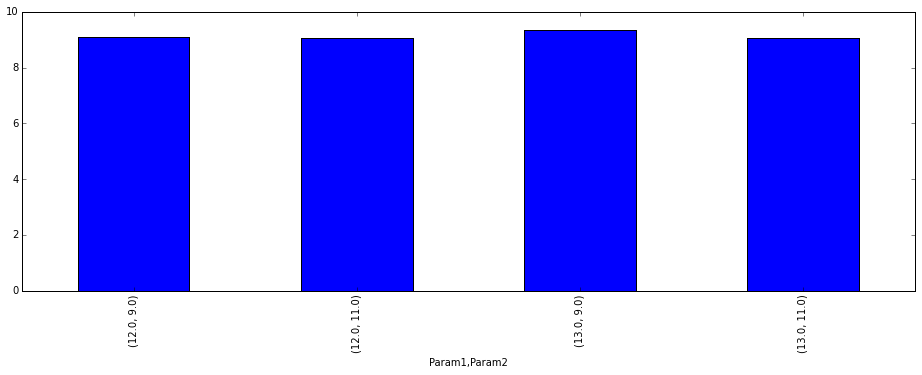

In [142]:
predParam1_2['MSE'].mean().plot(kind='bar')

In [143]:
predictions.groupby('Param3').count()

,Param1,Param2,Param4,Pred1,Pred2,Pred3,Pred4,Pred5,Pred6,MSE,Time
Param3,,,,,,,,,,,
0.20,19,19,19,19,19,19,19,19,19,19,19
0.25,21,21,21,21,21,21,21,21,21,21,21
0.30,10,10,10,10,10,10,10,10,10,10,10


In [144]:
predictions.groupby('Param3')['MSE'].mean()

Param3
0.20    9.342664
0.25    8.814136
0.30    9.760544
Name: MSE, dtype: float64

In [145]:
predictions.groupby('Param4').count()

,Param1,Param2,Param3,Pred1,Pred2,Pred3,Pred4,Pred5,Pred6,MSE,Time
Param4,,,,,,,,,,,
50,29,29,29,29,29,29,29,29,29,29,29
100,21,21,21,21,21,21,21,21,21,21,21


In [147]:
predictions.groupby('Param4')['MSE'].min()

Param4
50     2.990279
100    3.001902
Name: MSE, dtype: float64